<a href="https://colab.research.google.com/github/subhayuroy/MotorEvents/blob/master/eventAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the appropriate packages
Nothing new here. We will import logistic regression class along with some helpers from scikit-learn.

In [11]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


Let's turn off the scientific notation for floating point numbers.

In [12]:
np.set_printoptions(suppress=True)

#Loading and examining the data
We will load our data from a CSV file and put it in a pandas an object of the DataFrame class.

In [123]:
df = pd.read_csv('final_data.csv')

Let's take a look at the data:

In [125]:
display(df.head(100))

Sensor 1  Sensor 3  Sensor 4  Sensor 7  ...        M1        M2        M3  Label
0  -0.331283  0.681506  0.568954  0.224422  ... -1.460296  2.195825 -0.265992      P
1  -1.008263  1.405004  1.036206  1.356694  ... -1.460296  2.195825 -0.265992      P
2  -2.526358  1.309652  0.673833  1.043908  ... -1.460296  2.195825 -0.265992      N
3  -0.920494 -0.309116 -0.503320  0.337750  ... -1.460296  2.195825 -0.265992      N
4  -0.142429 -1.354170 -1.281523 -0.512943  ... -1.460296  2.195825 -0.265992      N
..       ...       ...       ...       ...  ...       ...       ...       ...    ...
95  1.358756 -1.633603 -1.296496 -0.011391  ...  0.076392 -0.493903  0.165031      P
96  1.459530  1.236089  1.394013  0.903968  ...  0.076392 -0.493903  0.165031      P
97 -0.013451 -1.308276 -1.446629  2.349193  ...  0.109215 -0.490624  0.129113      N
98 -0.140241 -0.639847 -0.373286 -3.254295  ...  0.142039 -0.487345  0.093194      L
99 -0.294712 -0.279768 -0.306767 -0.226216  ...  0.174862 -0.484066  0.057276      P

[100 rows x 19 columns]

We first need to extract our data, from the dataframe, in **NumPy arrays**:

We can use a single **scatter plot** to take a look at our data:

In [20]:
fig = px.scatter(df, x="Temperature", y="Humidity", color="Label")
fig.show()

In [114]:
X = df.drop(['Sensor 1','Sensor 3','Sensor 4','Sensor 7', 'Sensor 9','Sensor 3 Missing','Wind level > 0', 'Wind level > 1', 'Wind level > 2', 'Label','Mode 1', 'Mode 2', 'Mode 3', 'Mode ?'], axis=1).to_numpy()
y_text = df['Label'].to_numpy()
y = LabelEncoder().fit_transform(y_text)

As a sanity check, let's check X:

In [126]:
X

array([[ 1.22862578,  1.18844788, -1.46029608,  2.19582459, -0.26599184],
       [ 1.24029794,  1.28130713, -1.46029608,  2.19582459, -0.26599184],
       [ 1.43288866,  1.58007168, -1.46029608,  2.19582459, -0.26599184],
       ...,
       [        nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan]])

...and the size:

In [116]:
X.shape

(3891, 5)

Let's do the same thing for y:

In [50]:
y

array([2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 2,
       2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1,
       2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1,

...and for shape of y_text:

In [51]:
y.shape

(642,)

#Splitting data
Again, let's split our data into training, validation and test sets. Let's use 60% (90 examples) for training, 20% for validation (30 examples) and the remaining 20% (30 examples) as test data.

In [67]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.4, random_state=0)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)

##Building and visualizing a $k$-NN model

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

Next, let's fit our knn to our X_train and y_train. This does nothing but store the training example as $k$-NN is "lazy": It does all calculations as prediction time and by measuring the distance from the operational datapoints provided (whose labels have to be predicted) to each of the training datapoints, finding the closest training datapoints to the operational points, looking at the labels for those closest training datapoints, and finding the majority class among them.

In [44]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Now, we can plot our training data in 3D with a **3D scatter plot** (we are going to use surface plots afterwards and the new interface of plotly cannot do surface plots yet, so we are using the older style rather than plotly express):

In [56]:
points_colorscale = [
                     [0.0, 'rgb(239, 85, 59)'],
                     [1.0, 'rgb(99, 110, 250)'],
                    ]

layout = go.Layout(scene=dict(
                              xaxis=dict(title='Temperature'),
                              yaxis=dict(title='Humidity'),
                              zaxis=dict(title='Label')
                             ),
                  )

points = go.Scatter3d(x=df['Temperature'], 
                      y=df['Humidity'], 
                      z=y,
                      mode='markers',
                      text=df['Label'],
                      marker=dict(
                                  size=3,
                                  color=y,
                                  colorscale=points_colorscale
                            ),
                     )

fig2 = go.Figure(data=[points], layout=layout)
fig2.show()

We have more than 3 features, so let's use a scatter matrix to visualize our data:

In [65]:
data_dimensions = df.columns[:5].to_list()

fig = px.scatter_matrix(df, dimensions=data_dimensions, color='Label')
fig.show()

###Let's plot the three datasets as well:



In [84]:
df_train = pd.DataFrame(np.c_[X_train, y_train], columns=df.columns[:6])
fig2 = px.scatter_matrix(df_train, dimensions=data_dimensions, color='Sensor 3 Missing')
fig2.show()

In [85]:
df_validation = pd.DataFrame(np.c_[X_validation, y_validation], columns=df.columns[:6])
fig3 = px.scatter_matrix(df_validation, dimensions=data_dimensions, color='Sensor 3 Missing')
fig3.show()

In [86]:
df_test = pd.DataFrame(np.c_[X_test, y_test], columns=df.columns[:6])
fig4 = px.scatter_matrix(df_test, dimensions=data_dimensions, color='Sensor 3 Missing')
fig4.show()

#Let's try with Decision Tree

In [87]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
import pandas as pd
import plotly.express as px
from pydotplus import graph_from_dot_data
from IPython.display import Image

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [88]:
np.set_printoptions(suppress=True)

In [104]:
df = pd.read_csv('final_data.csv')
display(df.head(100))

Sensor 1  Sensor 3  Sensor 4  Sensor 7  ...        M1        M2        M3  Label
0  -0.331283  0.681506  0.568954  0.224422  ... -1.460296  2.195825 -0.265992      P
1  -1.008263  1.405004  1.036206  1.356694  ... -1.460296  2.195825 -0.265992      P
2  -2.526358  1.309652  0.673833  1.043908  ... -1.460296  2.195825 -0.265992      N
3  -0.920494 -0.309116 -0.503320  0.337750  ... -1.460296  2.195825 -0.265992      N
4  -0.142429 -1.354170 -1.281523 -0.512943  ... -1.460296  2.195825 -0.265992      N
..       ...       ...       ...       ...  ...       ...       ...       ...    ...
95  1.358756 -1.633603 -1.296496 -0.011391  ...  0.076392 -0.493903  0.165031      P
96  1.459530  1.236089  1.394013  0.903968  ...  0.076392 -0.493903  0.165031      P
97 -0.013451 -1.308276 -1.446629  2.349193  ...  0.109215 -0.490624  0.129113      N
98 -0.140241 -0.639847 -0.373286 -3.254295  ...  0.142039 -0.487345  0.093194      L
99 -0.294712 -0.279768 -0.306767 -0.226216  ...  0.174862 -0.484066  0.057276      P

[100 rows x 19 columns]

Let's create a **scatter plot** to visualize the data:

In [90]:
data_dimensions = df.columns[:-1].to_list()
figure_size = df.shape[1] * 256

fig = px.scatter_matrix(df, dimensions=data_dimensions, color='Label', width=figure_size, height=figure_size)
fig.show()

In [127]:
X = df.drop(['Temperature','Humidity','M1','M2','M3','Sensor 3 Missing','Wind level > 0', 'Wind level > 1', 'Wind level > 2', 'Label','Mode 1', 'Mode 2', 'Mode 3', 'Mode ?'], axis=1).to_numpy()
y = df['Label'].to_numpy()

Let's see our data:

In [128]:
X

array([[-0.33128283,  0.68150625,  0.56895434,  0.22442169, -0.44758797],
       [-1.00826265,  1.40500375,  1.03620635,  1.35669424,  0.94570376],
       [-2.52635844,  1.30965164,  0.67383251,  1.04390756,  0.02889696],
       ...,
       [ 1.0734605 , -0.58734752, -0.24767392, -1.27648059,  0.27808085],
       [-0.68207352,  0.34481122,  0.17098592,  0.31300772, -0.43229019],
       [ 1.27051537, -2.68794976, -2.24481992, -0.96113776, -0.95944476]])

In [129]:
y

array(['P', 'P', 'N', ..., 'N', 'P', 'N'], dtype=object)

##Splitting the Data

In [130]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.4, random_state=0)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)

##Building and Fitting a Decision Tree

In [131]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##Visualizing the decision tree
Now, let's visualize our decision tree. Let's export our model as a special kind of data, create a visual representation form that, generate a graph from that representation and show that graph as an image (it may be a big image, so you may have to scroll to see the whole thing):

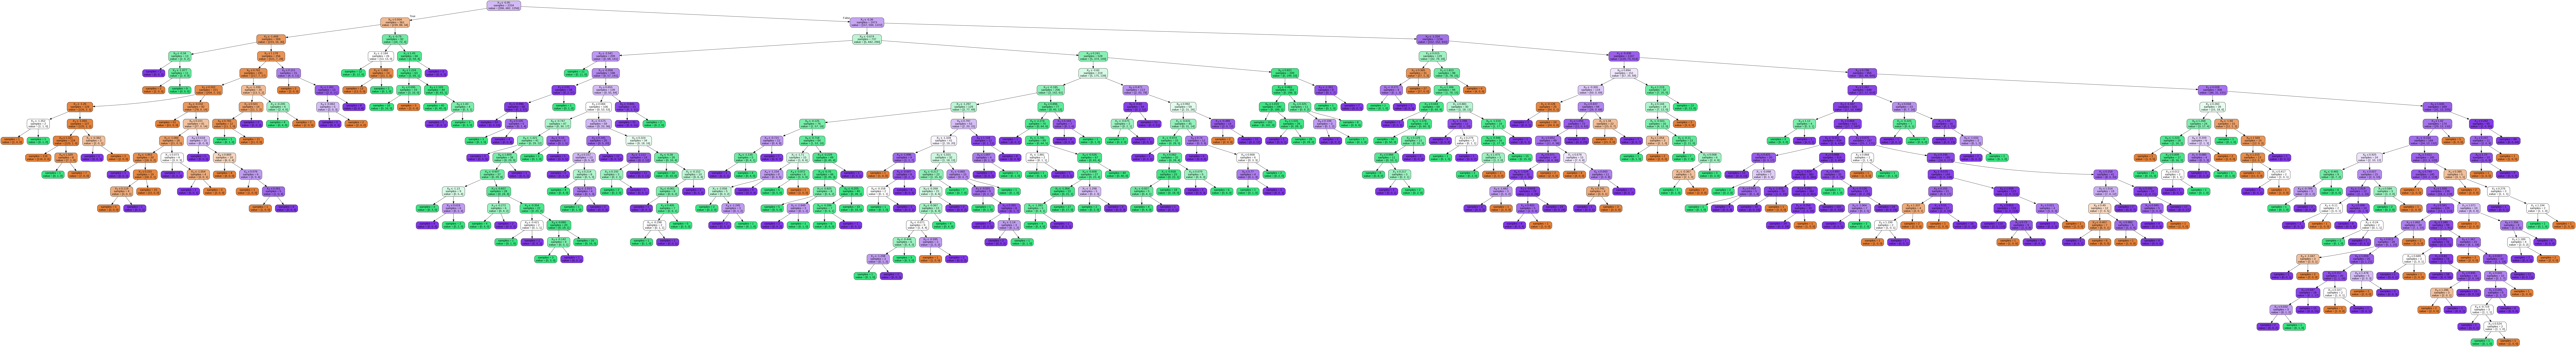

In [132]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, impurity=False, special_characters=True)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), unconfined=True)

##Model assessment and selection
So let's evaluate our QuAM. First, let's see what happened on training data.

In [133]:
yhat_train = dtree.predict(X_train)

Accuracy Score:

In [134]:
accuracy_score(yhat_train, y_train)

1.0

A perfect 1.0 or 100%! However, that was what was expected given the minimum leaf size was 1, we let the decision tree split leafs with even 2 points in them and we had no tree depth limittation among other things.

In [135]:
yhat_validation = dtree.predict(X_validation)

accuracy_score(yhat_validation, y_validation)

0.8329048843187661

Right. The accuracy on validation data is much lower. Maybe we have overfit to our data. Unrestricted decision trees do that.

In [136]:
from sklearn import tree
dtree2 = tree.DecisionTreeClassifier(min_samples_leaf = 15)

dtree2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [137]:
yhat_train2 = dtree2.predict(X_train)

accuracy_score(yhat_train2, y_train)

0.8706083976006855

Training accuracy is predictably lower as we restrcited our decision tree, so it does not fit perfectly to training data because of its constraints.

In [138]:
yhat_validation2 = dtree2.predict(X_validation)

accuracy_score(yhat_validation2, y_validation)

0.8161953727506427

Yes! We have a better score on validation points. We may be ovefitting less this time!

##Evaluating the decision tree
Finally, let's use the test data to get a final accuracy performance number for our model. Predict yhat_test2 using dtree2. We can then calculate the accuracy on test data:

In [139]:
yhat_test2 = dtree2.predict(X_test)

accuracy_score(yhat_test2, y_test)

0.8164313222079589

The accuracy on test data, on validation data*(0.8164313222079589)* and on training data*(0.8161953727506427)* are close to each other, which is a good sign.

#Conclusion
So, our analysis on the functioning of a specific motor is completed.
We can conclude that the functioning of this motor is devoid of all external factors like **temperature**, **humdity**, **wind level**, and so on. Basically, it depends on the calibration of all the **Sensors** *(1-9 excluding few)* present inside it. We can also see, our model is a success.